<img src="./imgs/GA-logo.png" style="float: left; margin: 20px; height: 55px">

# Cross-Validation Lesson

_Authors: Dave Yerrington (SF), Joseph Nelson (DC), Kiefer Katovich (SF), Riley Dallas(AUS), Adi Bronshtein (Live Online), Jeff Hale (Live Online)_

---

### Learning Objectives
- **Describe** train/test split
- **Describe**  cross-validation.
- **Explain** how these validation techniques differ and why we want to use them.
- **Split** data into testing and training sets using train/test split and train, evaluate, and interpret
- **Use** cross-validation to choose your hyperparameters

## Overfitting and Underfitting

---

![](imgs/overfitting.jpg)


**What's wrong with the first model?**


**What's wrong with the third model?**


**The middle "Goldilocks" model is a good compromise.**
- It approximates the complexity of the true model and does not model random noise in our sample as true relationships.

![](imgs/overfitting2.png)

#### Import libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


<a id='demo'></a>

#### Load the Data

---

Today's [dataset](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) (`Advertising.csv`) is from the [ISLR website](http://faculty.marshall.usc.edu/gareth-james/ISL/index.html). 

Drop `Unnamed: 0` once you've loaded the csv into a `DataFrame`.

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv')


In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
import matplotlib.pyplot as plt

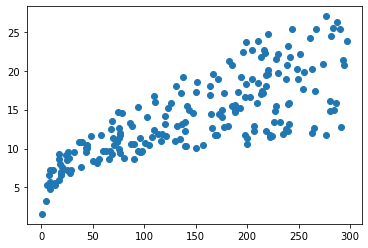

In [8]:
X = df[['TV']]
y = df['Sales']
plt.scatter(X, y); #does seem like there's a linear relationship here 

## Data cleaning
---

1. Do we have any null values?


In [11]:
df.isnull().sum() #no missing data woohoo! 

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

#### EDA: Plot a Heatmap of the Correlation Matrix
---

Heatmaps are an effective way to visually examine the correlational structure of your predictors. 

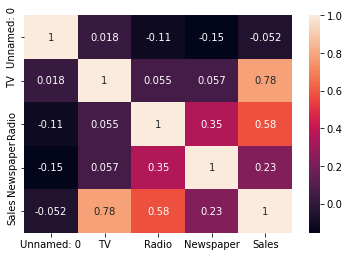

In [14]:
sns.heatmap(df.corr(), annot = True); #gives the correlations

In [ ]:
#numbers speak to the relationship between TV and Sales (0.78)
#stronger relationship between TV and Sales than Newspaper and Radio 

In [ ]:
#can draw scatter plots of all of them as well to visualize this 

#### EDA: Use seaborn's `.pairplot()` method to create scatterplots for each of our columns
---

KeyError: "['Unamed: 0'] not found in axis"

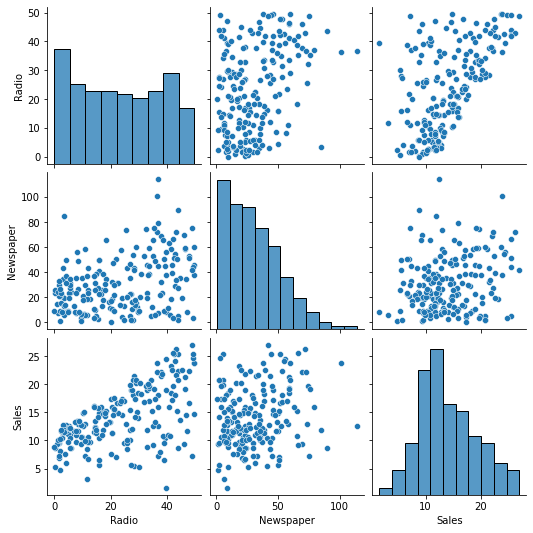

In [19]:
sns.pairplot(df)



<a id='x-y'></a>

## Create our features matrix (`X`) and target vector (`y`)
---

The following columns will be our features:
- `TV`
- `radio`
- `newspaper`

The `sales` column is our label: the column we're trying to predict.

Create your `X` and `y` variables.

In [29]:
features = ['TV', 'Radio', 'Newspaper']

In [30]:
X = df[features]
y = df['Sales']

<a name="train-test-split"></a>
## Train/Test Split

---

What would a good model do?

Predict values for y that are close to the true values for y - WITH DATA IT HASN'T SEEN!

This is called _generalizing to new data_. 

### If your model doesn't generalize well, it's not good.

---

So far we've fit our models with ALL our data. So we haven't tried to generalize to unseen data.

One popular method for evaluating how well our model generalizes is to break our data into 2 parts:

This basic is called **train/test split**.

Split our data into two parts:

> **"A Train Set":** The subset of the data on which we fit our model.

> **"A Test Set":** The subset of the data on which we EVALUATE the quality of our model.

<a id='sklearn-tts'></a>

## Scikit-Learn's `train_test_split` function
---

In [31]:
from sklearn.model_selection import train_test_split

This is tattoo worthy. 💪

#### What's the default test set percentage?

### What do the resulting variables look like?

In [41]:
# What's the default test set percentage?

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#get training data and test data back 

In [38]:
X_train.shape 

(150, 3)

In [39]:
X_train.head()

,TV,Radio,Newspaper
114,78.2,46.8,34.5
173,168.4,7.1,12.8
5,8.7,48.9,75.0
126,7.8,38.9,50.6
117,76.4,0.8,14.8


In [40]:
X_test.shape

(50, 3)

In [42]:
y_train.head(2) #align with the X_train 

114    14.6
173    11.7
Name: Sales, dtype: float64

### Are they rows now randomized?

## Linear Regression model
---

Create a `LinearRegression` model

In [43]:
from sklearn.linear_model import LinearRegression

Fit it to your **training data** (`X_train`, `y_train`)

In [44]:
lr = LinearRegression().fit(X_train, y_train) #fit on training data

#### Make predictions on the test set. You are using X_test to predict what you think the y values should be.

In [45]:
test_preds = lr.predict(X_test)

In [46]:
train_preds = lr.predict(X_train)

### Model Evaluation
---

Now use `.score` or a sklearn scoring function such as `mean_squared_error` to evaluate your model's performance on the test data. (how close are your y predictions to the ground truth values for y?)

#### Score on the training set

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y_test, test_preds) #test MSE 

#care mostly about this - predicting on new unseen data, generalizability! 

2.8800237300941944

In [49]:
mean_squared_error(y_train, train_preds) #training MSE 

2.7678910780469725

![](imgs/I-am-something-of.jpg)

You care about the test set score. That's the important thing. 

The training set score gives you a hint to as to whether your model is underfitting or overfitting. 


Let's look at the training set score.

It's rare that the MSE is higher for the train set than the test set. Usually the MSE is higher for the test set.

___

---
<a id='cross-val-k-fold'></a>

# K-Fold Cross-Validation

---

K-fold cross-validation takes the idea of a single train/test split and expands it to *multiple tests* across different train/test splits of your data.

For example, if you determine your training set will contain 80 percent of the data and your testing set will contain the other 20 percent, you could have five different 80/20 splits in which the test set in each is a different set of observations. We have:
- Five (K=5) training sets.
- Five (K=5) corresponding testing sets.

**K-fold cross-validation builds K models — one for each train/test pair — and evaluates those models on each respective test set.**

### K-Fold Cross-Validation Visually with K = 3

<img src="https://snag.gy/o1lLcw.jpg?convert_to_webp=true" width="500">

---

Cross-validation helps us understand how a model might perform in a variety of cases. 

## K-Folds Cross Validation in `sklearn`
---

Now let's try out k-fold cross-validation. scikit-learn provides a useful function

With a regression problem, `cross_val_score` returns the $R^2$ for each of the orange sections above by default. 


In [50]:
from sklearn.model_selection import cross_val_score


What does each of those values represent?

In [51]:
cross_val_score(lr, X_train, y_train) #cv controls how many folds there are (default is 5 fold)

array([0.81922047, 0.92868213, 0.92647764, 0.91472696, 0.76837337])

In [ ]:
#represent the 5 bins we separated training data into (1/5ths)
# these are the default score for linear regression - the higher the better 
# this is technically R^2 

In [52]:
cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error')

#negative used because it's easier for the function's computations (can just ignore the negative sign)

#varies from fold to fold to fold - model may be too complex! 

array([-4.02905542, -1.60349604, -2.1790918 , -2.8572684 , -4.53254457])

What might be some nice summary statistics?

In [53]:
np.mean(cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error'))

-3.040291244111598

## TTS with cross validation setup

![](https://media.giphy.com/media/3bbcAXSqdmkqBQ22qw/giphy.gif)

### Steps:
1. Split dataset into test/holdout set and training set using `train_test_split`. Don't touch the holdout/test set until the end. ⚠️
1. Then do cross validation on the remaining 80% of the data (splitting it 5 different ways)
1. Look at your validation scores (take the mean)
1. Repeat for other models/hyperparameters
1. Fit the best model on all the training data
1. Score the best model on the holdout/test dataset


### We need to use cross validation first and then use our test/holdout set 
We don't want information from the test set to leak into the training set when choosing our best model. 

![

### Let's do TTS again and THEN do cross validation on the remaining training set


In [ ]:
#how does our model perform on the test data? 

In [ ]:
X_test.head(2)

In [ ]:
y_train.head(2)

In [ ]:
y_test.head(2)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

##### Instantiate a linear regression model

#### Use `cross_val_score` with the training data

You get back an array with the R2 for each of the validation sets.

Let's take the mean.

#### Let's compare a different model

Let's try a quadratic model

In [54]:

# usually we'll do more interesting hyperparameter tuning

X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [55]:
X['tv^2'] = X['TV']**2
X['radio^2'] = X['Radio']**2
X['newspaper^2'] = X['Newspaper']**2

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_1680/629865158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tv^2'] = X['TV']**2


In [56]:
X.head()

,TV,Radio,Newspaper,tv^2,radio^2,newspaper^2
0,230.1,37.8,69.2,52946.01,1428.84,4788.64
1,44.5,39.3,45.1,1980.25,1544.49,2034.01
2,17.2,45.9,69.3,295.84,2106.81,4802.49
3,151.5,41.3,58.5,22952.25,1705.69,3422.25
4,180.8,10.8,58.4,32688.64,116.64,3410.56


In [58]:
#train/test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### How did that model do?

In [60]:
cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error')

array([-3.0874884 , -1.40012505, -1.64892729, -3.11500346, -3.55847771])

In [61]:
#Looks like quadratic might be better 
np.mean(cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error'))

-2.562004381202697

### Fit the best model on ALL the training data

In [62]:
lr.fit(X_train, y_train) #this is the quadratic 

LinearRegression()

Score the best model on the holdout/test set

#### Now, let's see how our best model does with data it has never seen before (new data)! 🚀

In [63]:
mean_squared_error(y_test, lr.predict(X_test))

2.272638204909222

#### How does that compare to the MSE score on the whole training data?

In [65]:
mean_squared_error(y_train, lr.predict(X_train))

#model is not overfitting right now! Not too complex with the quadratic term

2.256122025388435

The difference between score on the training and test sets isn't large, so our model is not overfitting to the training data.

In [ ]:
#Let's try with cubic 

In [67]:
# 1) add cubed features 

X['tv^3'] = X['TV']**3
X['radio^3'] = X['Radio']**3
X['newspaper^3'] = X['Newspaper']**3

X.head()

,TV,Radio,Newspaper,tv^2,radio^2,newspaper^2,tv^3,radio^3,newspaper^3
0,230.1,37.8,69.2,52946.01,1428.84,4788.64,1.218288e+07,54010.152,331373.888
1,44.5,39.3,45.1,1980.25,1544.49,2034.01,8.812112e+04,60698.457,91733.851
2,17.2,45.9,69.3,295.84,2106.81,4802.49,5.088448e+03,96702.579,332812.557
3,151.5,41.3,58.5,22952.25,1705.69,3422.25,3.477266e+06,70444.997,200201.625
4,180.8,10.8,58.4,32688.64,116.64,3410.56,5.910106e+06,1259.712,199176.704


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [69]:
# 2) cross validate on Train

cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error')


array([-2.53896782, -1.43966628, -1.89241564, -3.05514903, -3.17089026])

In [70]:
np.mean(cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error'))

-2.4194178051267574

In [ ]:
# 3) how does this compare to quadratic? 

In [71]:
lr.fit(X_train, y_train) #this is the cubed

LinearRegression()

In [72]:
mean_squared_error(y_test, lr.predict(X_test))

1.8870208574078837

In [73]:
mean_squared_error(y_train, lr.predict(X_train))

2.0282601528235014

In [ ]:
#these are good - scores went down! if we kept increasing complexity the scores would start going back up


## Exercise

### Compare three models to find the best performing model

1. with only TV and Radio as predictors of Sales.
1. with only Radio as a predictor of Sales.
1. with only TV as a predictor of Sales.

### Steps

1. Set up X and y
1. Split the data with `train_test_split` with a random state of 1.
1. Use `cross-val_score` to check which model works best.
1. Fit the best-performing model on all the training data.
1. Score the best-performing model on the hold-out/test dataset.
1. Which model performed best?
1. Use R2 as your evaluation metric.



--- 
## Summary

You will use `train_test_split()` all the time in your machine learning modeling workflow. You create your test/holdout set and put it to the side so it doesn't influence your model in any way.

You will rarely use `cross_val_score()` directly with your training and validation sets. But you will use scikit-learn's `GridSearchCV` for your training and validation sets all the time. It does the same thing as `cross_val_score`, but is nicer to use. You'll learn about that soon. 👍

---
## Check for understanding
- What is the purpose of splitting a dataset into a training set and a test set?
- What evaluation metric score do you care most about - the training set, validation set, or test set?
- What is the advantage of using cross-validation to tune your hyperparameters instead of train_test_set?